In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Logistic Regression

In [309]:
data = np.loadtxt('ex2data1.txt', delimiter=',')
# Todos tienen (100,)
exam_score_1, exam_score_2, y  = data[:,0], data[:,1], data[:,2]
M = len(y)
N = 3
labels = np.array(list(map(lambda student: 'Admitted' if student[2] == 1 else 'Not admitted', data)))

## Visualizing the data

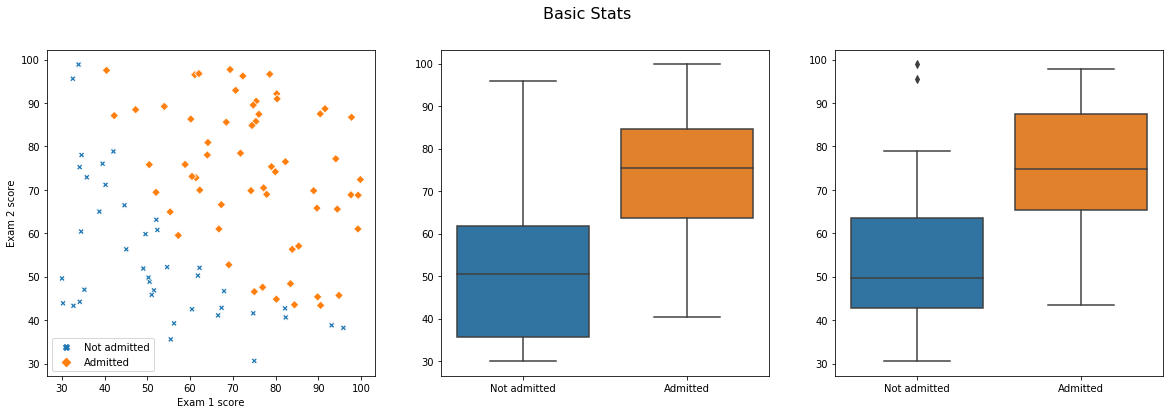

In [310]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Basic Stats', fontsize=16)

sns.scatterplot(x=exam_score_1, y=exam_score_2, hue=labels, style=labels, ax=ax1, markers={'Admitted': 'D', 'Not admitted': 'X'})
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')

sns.boxplot(x=labels, y=exam_score_1, ax=ax2)
sns.boxplot(x=labels, y=exam_score_2, ax=ax3)

plt.show()

### Cost function and gradient

In [311]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

print(f'sigmoid(0) = {sigmoid(0)}')
print(f'sigmoid(-100) = {sigmoid(-1000)}')
print(f'sigmoid(90) = {sigmoid(90)}')

sigmoid(0) = 0.5
sigmoid(-100) = 0.0
sigmoid(90) = 1.0


c:\users\jonathan muñoz\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [312]:
# initial_theta -> (3,)
initial_theta = np.zeros(N) # n features + 1

In [313]:
# X -> (3, 100)
X = np.vstack((np.ones(M), exam_score_1, exam_score_2))

In [314]:
def costFunction(X, y, theta, M, N, lambda_ = 0):
    h = sigmoid(theta.T.dot(X))
    J = (-np.log(h).dot(y) - np.log(1-h).dot(1-y))/M + lambda_/(2*M)*(theta**2).sum()
    grad = X.dot((h - y))/M + np.array([0 if i == 0 else theta[i] for i in range(N)])*(lambda_/M)
    return J, grad

In [315]:
J, grad = costFunction(X, y, initial_theta, M, N)
J, grad

(0.6931471805599452, array([ -0.1       , -12.00921659, -11.26284221]))

In [316]:
test_theta = np.array([-24., .2, .2])
J_test, grad_test = costFunction(X, y, test_theta, M, N)
J_test, grad_test

(0.2183301938265977, array([0.04290299, 2.56623412, 2.64679737]))

### Gradient descent

In [317]:
alpha = .17
def gradientDescent(X, y, initial_theta, M, N, alpha = 0, lambda_ = 0):
    theta = initial_theta.copy()
    J_history = []
    iterations = 5000000
    for i in range(iterations):
        J, grad = costFunction(X, y, theta, M, N, lambda_ = lambda_ )
        J_history.append(J)
        
        theta -= (alpha/M) * grad
        
    return J_history, theta

In [318]:
J_history, theta = gradientDescent(X, y, initial_theta, M, N, alpha)

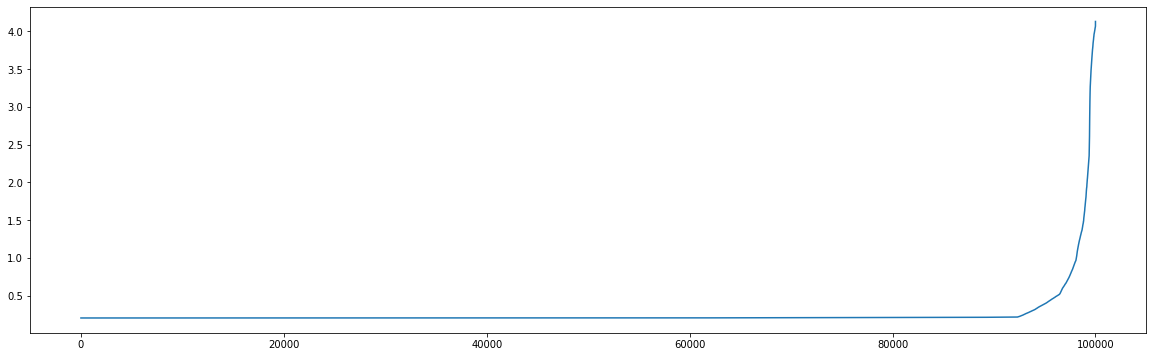

In [188]:
plt.figure(figsize=(20, 6))
sample = random.sample(J_history, 100000)
sample.sort()
sns.lineplot(x=[i for i in range(100000)], y=sample)
plt.show()

In [319]:
min(J_history)

0.20356414596932915

In [320]:
theta

array([-24.50047066,   0.20094609,   0.19612387])

### Evaluating logistic regresion

In [321]:
new_student_scores = np.array([1, 45, 85])
predictions = sigmoid(new_student_scores.T.dot(theta))
predictions

0.7707644314225659

### Plotting decision boundary

In [232]:
y_pred = sigmoid(X.T.dot(theta)) >= .5

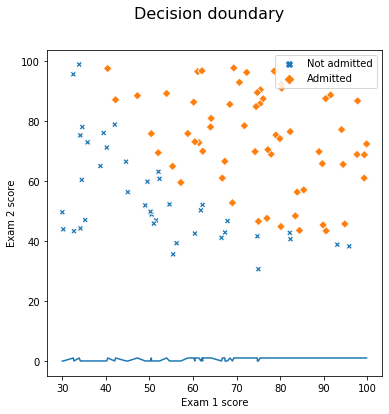

In [233]:
fig, ax1 = plt.subplots(figsize=(6, 6))
fig.suptitle('Decision doundary', fontsize=16)

sns.scatterplot(x=exam_score_1, y=exam_score_2, hue=labels, style=labels, ax=ax1, markers={'Admitted': 'D', 'Not admitted': 'X'})
ax1.set_xlabel('Exam 1 score')
ax1.set_ylabel('Exam 2 score')
sns.lineplot(x=exam_score_1, y=y_pred, ax=ax1)

plt.show()

# Regularized logistic regression

In [322]:
data = np.loadtxt('ex2data2.txt', delimiter=',')
m_test1, m_test2, y = data[:,0], data[:,1], data[:,2]
# 118
M = len(y)
N = 2
labels = np.array(list(map(lambda student: 'Accepted' if student[2] == 1 else 'Rejected', data)))

## Visualizating the data

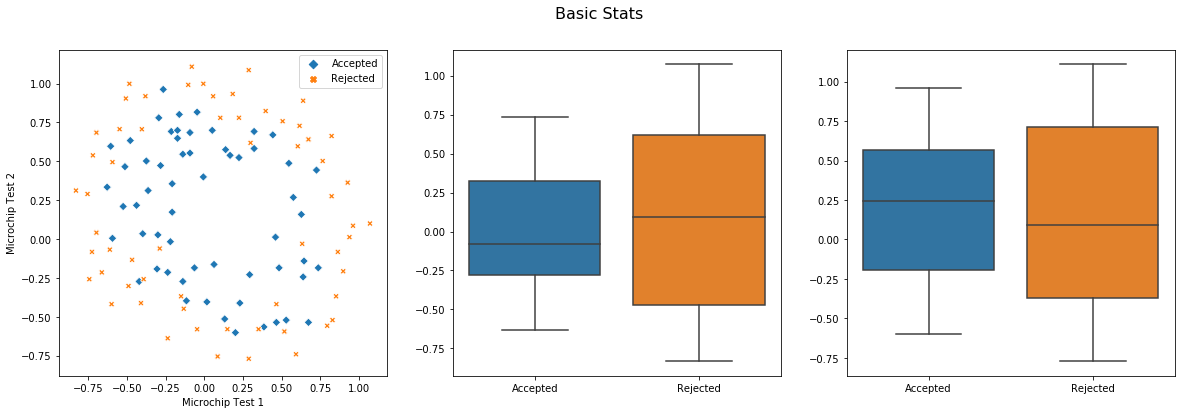

In [323]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Basic Stats', fontsize=16)

sns.scatterplot(x=m_test1, y=m_test2, hue=labels, style=labels, ax=ax1, markers={'Accepted': 'D', 'Rejected': 'X'})
ax1.set_xlabel('Microchip Test 1')
ax1.set_ylabel('Microchip Test 2')

sns.boxplot(x=labels, y=m_test1, ax=ax2)
sns.boxplot(x=labels, y=m_test2, ax=ax3)

plt.show()

## Feature mapping

In [324]:
max_degree = 6
lambda_ = 1

def map_feature(test_1, test_2, M):
    X_T = np.ones(M) 
    
    for i in range(1, max_degree+1):
        for j in range(i+1):
            X_T = np.vstack((X_T, test_1**(i-j) * test_2**j))
            
    return X_T.T

In [328]:
# X -> (118, 28)
X = map_feature(m_test1, m_test2, M)
N = X.shape[1]

### Cost function and gradient

In [329]:
initial_theta = np.zeros(N)

In [17]:
def costFunctionReg(theta, X, y, lambda_):
    h = sigmoid(X.dot(theta.T))
    J = (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))/M + theta.dot(theta.T)*alpha/(2*M)
    grad = X.T.dot(h - y) + np.array([0 if i == 0 else theta[i] for i in range(len(theta))])*alpha
    return J, grad/M

In [332]:
J, grad = costFunction(X.T, y, initial_theta, M, N, lambda_)
J, grad[:5]

(0.6931471805599454,
 array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
        1.15013308e-02]))

In [335]:
test_theta = np.ones(N)
lambda_ = 10
J_test, grad_test  = costFunction(X.T, y, test_theta, M, N, lambda_)
J_test, grad_test 

(3.2068822129709416,
 array([0.34604507, 0.16135192, 0.19479576, 0.22686278, 0.09218568,
        0.24438558, 0.14339212, 0.10844171, 0.10231439, 0.18346846,
        0.17353003, 0.08725552, 0.11822776, 0.0858433 , 0.19994895,
        0.13522653, 0.09497527, 0.09356441, 0.09979784, 0.09140157,
        0.17485242, 0.14955442, 0.08678566, 0.09897686, 0.08531951,
        0.10190666, 0.08450198, 0.18228323]))

In [336]:
J_history, theta = gradientDescent(X.T, y, initial_theta, M, N, lambda_=1, alpha=.15)

In [ ]:
min(J_history)

In [ ]:
theta[:10]